# Reto Kellog 2019 Data JAM

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [136]:
data = pd.read_csv("sales_sample.csv", sep='\t')

In [137]:
denue = pd.read_csv('denueComercios.csv', encoding='latin-1',low_memory=False)

In [138]:
print(data)

       Branch_Name  Customer_Code          Customer_Name Customer_Type  \
0         ECATEPEC        10200.0       ABAR LA ESTRELLA         PLATA   
1         ECATEPEC        10200.0       ABAR LA ESTRELLA         PLATA   
2         ECATEPEC        10200.0       ABAR LA ESTRELLA         PLATA   
3         ECATEPEC        10200.0       ABAR LA ESTRELLA         PLATA   
4         ECATEPEC        10200.0       ABAR LA ESTRELLA         PLATA   
...            ...            ...                    ...           ...   
183552     ORIENTE      9307476.0  VINOS Y LICORES RICKY         PLATA   
183553     ORIENTE      9307476.0  VINOS Y LICORES RICKY         PLATA   
183554     ORIENTE      9307476.0  VINOS Y LICORES RICKY         PLATA   
183555     ORIENTE      9307476.0  VINOS Y LICORES RICKY         PLATA   
183556     ORIENTE      9307476.0  VINOS Y LICORES RICKY         PLATA   

       Category_Name    Latitud   Longitud  Product_Code  \
0               RTEC  19.595772 -98.997218    10080

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183557 entries, 0 to 183556
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Branch_Name          183557 non-null  object 
 1   Customer_Code        183557 non-null  float64
 2   Customer_Name        183557 non-null  object 
 3   Customer_Type        183557 non-null  object 
 4   Category_Name        183557 non-null  object 
 5   Latitud              183557 non-null  float64
 6   Longitud             183557 non-null  float64
 7   Product_Code         183557 non-null  int64  
 8   Product_Description  183557 non-null  object 
 9   rSales               179417 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.0+ MB


In [140]:
data.describe()

,Customer_Code,Latitud,Longitud,Product_Code,rSales
count,1.835570e+05,183557.000000,183557.000000,1.835570e+05,179417.000000
mean,1.186891e+14,19.482142,-99.127533,1.663138e+09,36.593517
std,6.108048e+15,0.211039,0.117437,1.232209e+09,380.397413
min,1.020000e+04,18.325640,-100.158102,4.000000e+01,0.000000
25%,9.101264e+06,19.383461,-99.196790,1.008011e+09,9.000000
50%,9.113054e+06,19.502700,-99.130290,1.008015e+09,20.000000
75%,9.204120e+06,19.608984,-99.071022,1.008094e+09,40.000000
max,3.205100e+17,20.735220,-98.068890,1.008012e+10,115200.000000


In [141]:
data.shape

(183557, 10)

In [142]:
denue.head()

,id,nom_estab,nombre_act,per_ocu,tipo_asent,cod_postal,cve_mun,tipoUniEco,Latitud,Longitud,fecha_alta
0,9234749,241202 ECTP RECURSOS HUMANOS,Comercio al por menor en tiendas departamentales,101 a 250 personas,COLONIA,55500,33,Fijo,19.602150,-99.051596,2020-04
1,7022831,3 B,Comercio al por menor en minisupers,0 a 5 personas,COLONIA,55067,33,Fijo,19.648404,-98.993870,2019-11
2,6357704,3018 EL GLOBO NEZAHUALCOYOTL II SOR JUANA,Comercio al por menor de otros alimentos,11 a 30 personas,COLONIA,57700,58,Fijo,19.395513,-99.019995,2010-07
3,6350523,3022 EL GLOBO ARAGÓN,Comercio al por menor de otros alimentos,11 a 30 personas,COLONIA,55140,33,Fijo,19.532407,-99.028034,2010-07
4,6350522,3061 EL GLOBO NEZAHUALCÓYOTL,Comercio al por menor de otros alimentos,6 a 10 personas,COLONIA,56340,58,Fijo,19.406798,-99.016670,2010-07


In [143]:
denue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50577 entries, 0 to 50576
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50577 non-null  int64  
 1   nom_estab   50577 non-null  object 
 2   nombre_act  50577 non-null  object 
 3   per_ocu     50577 non-null  object 
 4   tipo_asent  50577 non-null  object 
 5   cod_postal  50577 non-null  int64  
 6   cve_mun     50577 non-null  int64  
 7   tipoUniEco  50577 non-null  object 
 8   Latitud     50577 non-null  float64
 9   Longitud    50577 non-null  float64
 10  fecha_alta  50577 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [145]:
denue.describe()

,id,cod_postal,cve_mun,Latitud,Longitud
count,5.057700e+04,50577.000000,50577.000000,50577.000000,50577.000000
mean,4.393390e+06,57634.955672,42.472191,19.662886,-99.036375
std,2.801795e+06,7913.882049,12.127872,1.008006,1.165311
min,1.965230e+06,3330.000000,33.000000,17.164724,-111.138432
25%,2.106527e+06,55119.000000,33.000000,19.411132,-99.052863
50%,2.296095e+06,55418.000000,33.000000,19.519933,-99.032677
75%,7.469055e+06,57310.000000,58.000000,19.579004,-99.005830
max,9.249122e+06,99999.000000,58.000000,30.547065,-88.908247


In [146]:
denue.shape

(50577, 11)

In [147]:
data.head()

,Branch_Name,Customer_Code,Customer_Name,Customer_Type,Category_Name,Latitud,Longitud,Product_Code,Product_Description,rSales
0,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,RTEC,19.595772,-98.997218,1008043774,PAKETITO FROOT LOOPS 25GR,4.0
1,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,RTEC,19.595772,-98.997218,1008094285,PAKETITO ZUCARITAS 30GR,4.0
2,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,RTEC,19.595772,-98.997218,1008010299,CHOCO KRISPIS 660GR,5.0
3,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,SALTY SNACKS,19.595772,-98.997218,3800014168,PRINGLES ORIGINAL 37GR,16.0
4,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,SALTY SNACKS,19.595772,-98.997218,3800014169,PRINGLES CREMA-CEBOLLA 4OGR,0.0


In [148]:
denue.head()

,id,nom_estab,nombre_act,per_ocu,tipo_asent,cod_postal,cve_mun,tipoUniEco,Latitud,Longitud,fecha_alta
0,9234749,241202 ECTP RECURSOS HUMANOS,Comercio al por menor en tiendas departamentales,101 a 250 personas,COLONIA,55500,33,Fijo,19.602150,-99.051596,2020-04
1,7022831,3 B,Comercio al por menor en minisupers,0 a 5 personas,COLONIA,55067,33,Fijo,19.648404,-98.993870,2019-11
2,6357704,3018 EL GLOBO NEZAHUALCOYOTL II SOR JUANA,Comercio al por menor de otros alimentos,11 a 30 personas,COLONIA,57700,58,Fijo,19.395513,-99.019995,2010-07
3,6350523,3022 EL GLOBO ARAGÓN,Comercio al por menor de otros alimentos,11 a 30 personas,COLONIA,55140,33,Fijo,19.532407,-99.028034,2010-07
4,6350522,3061 EL GLOBO NEZAHUALCÓYOTL,Comercio al por menor de otros alimentos,6 a 10 personas,COLONIA,56340,58,Fijo,19.406798,-99.016670,2010-07


# Mapa Mexico

In [149]:
state_bound = gpd.read_file('México_Estados.shp')

<AxesSubplot:>

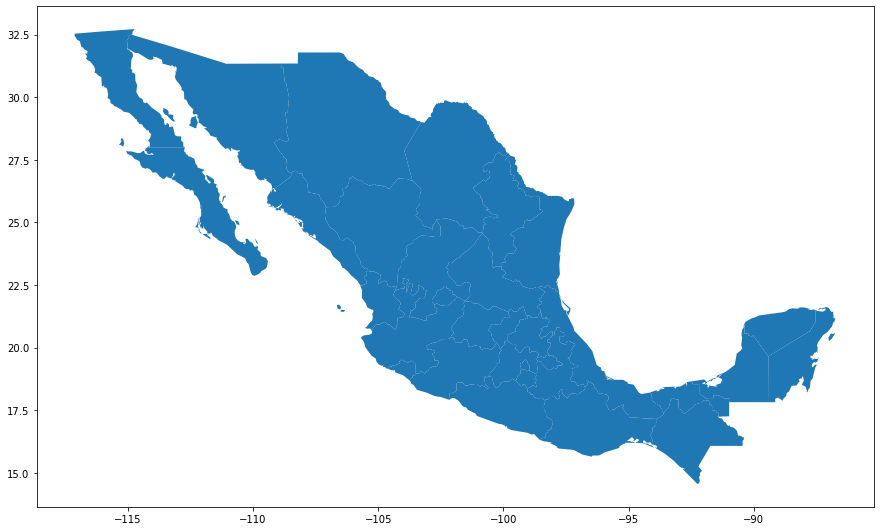

In [150]:
fig,ax = plt.subplots(figsize = (15,15))
state_bound.plot(ax = ax)

In [151]:
state_bound.head()

,CODIGO,ESTADO,geometry
0,MX02,Baja California,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,MX03,Baja California Sur,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,MX18,Nayarit,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,MX14,Jalisco,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,MX01,Aguascalientes,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [152]:
state_bound_EDOMEX = state_bound.CODIGO == "MX15"

In [153]:
EDOMEX = state_bound[state_bound_EDOMEX]

<AxesSubplot:>

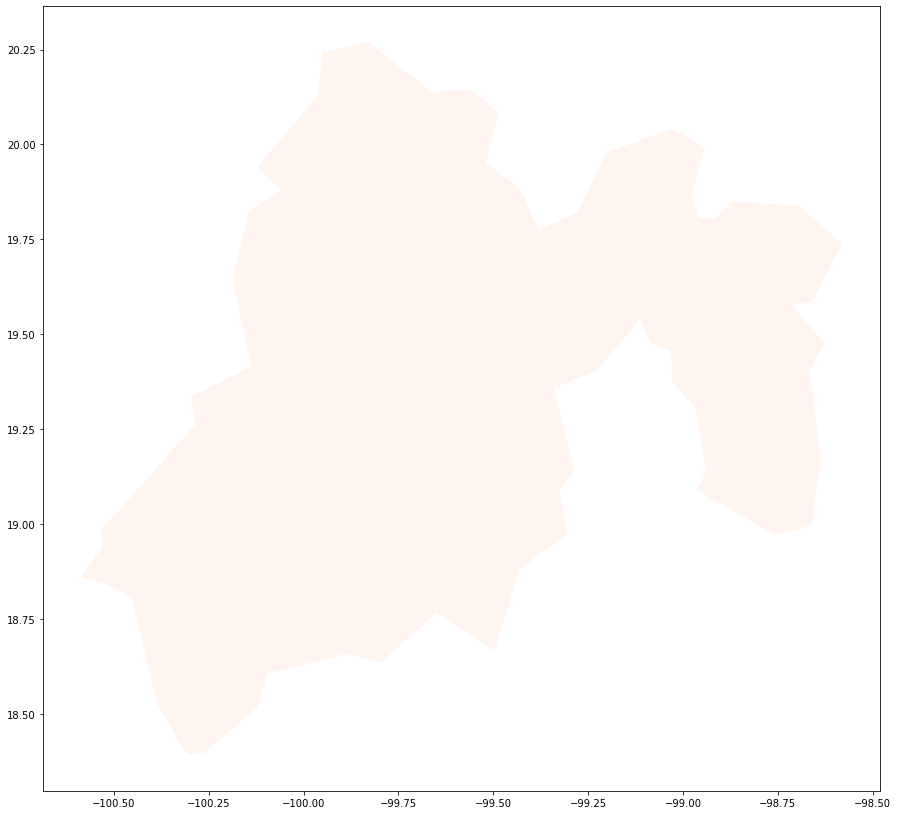

In [154]:
fig, ax = plt.subplots(1, figsize =(15, 15)) 
EDOMEX.plot(ax = ax, cmap ='Reds')

In [155]:
EDOMEX.crs

{'init': 'epsg:4326'}

# Geopandas requires we know the geospatial reference system identifier so here is a list of common ones.

“EPSG:4326” WGS84 Latitude/Longitude, used in GPS
“EPSG:3395” Spherical Mercator. Google Maps, OpenStreetMap, Bing Maps
“EPSG:32633” UTM Zones (North) – (Universal Transverse Mercator)
“EPSG:32733” UTM Zones (South) – (Universal Transverse Mercator)

# EDO MEX plot sales Kellogs in ecatepec and neza

In [156]:
pointsKellogs = data.apply(lambda row: Point(row.Longitud, row.Latitud), axis=1)

In [157]:
salesKellogs = gpd.GeoDataFrame(data, geometry=pointsKellogs)

In [158]:
salesKellogs.crs = {'init': 'epsg:4326'}

In [159]:
salesKellogs.head(2)

,Branch_Name,Customer_Code,Customer_Name,Customer_Type,Category_Name,Latitud,Longitud,Product_Code,Product_Description,rSales,geometry
0,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,RTEC,19.595772,-98.997218,1008043774,PAKETITO FROOT LOOPS 25GR,4.0,POINT (-98.99722 19.59577)
1,ECATEPEC,10200.0,ABAR LA ESTRELLA,PLATA,RTEC,19.595772,-98.997218,1008094285,PAKETITO ZUCARITAS 30GR,4.0,POINT (-98.99722 19.59577)


<AxesSubplot:>

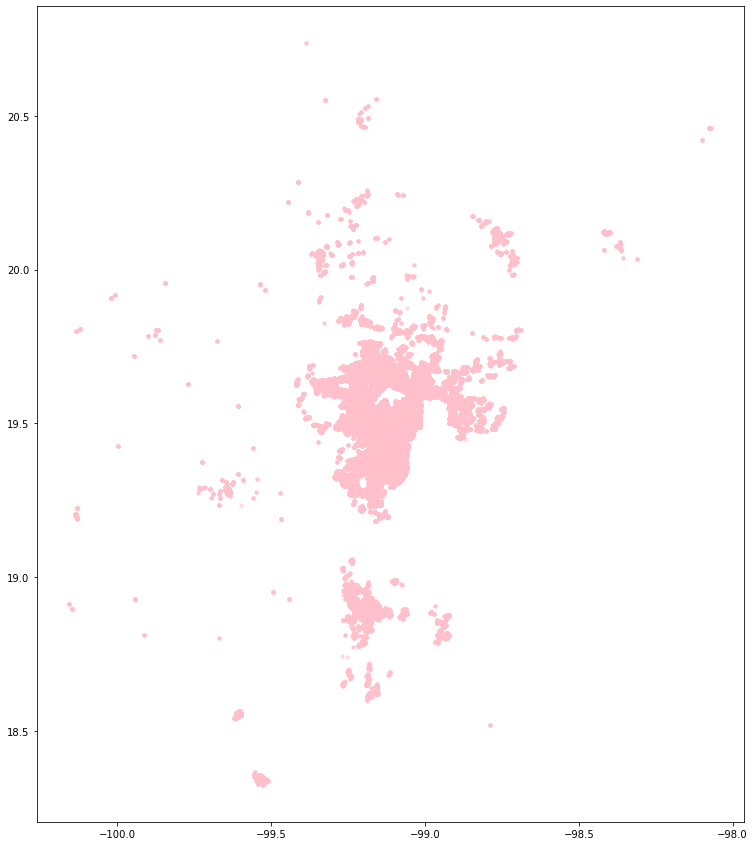

In [160]:
salesKellogs.plot(figsize=(15,15), markersize=10, color='pink', alpha=0.5)

<AxesSubplot:>

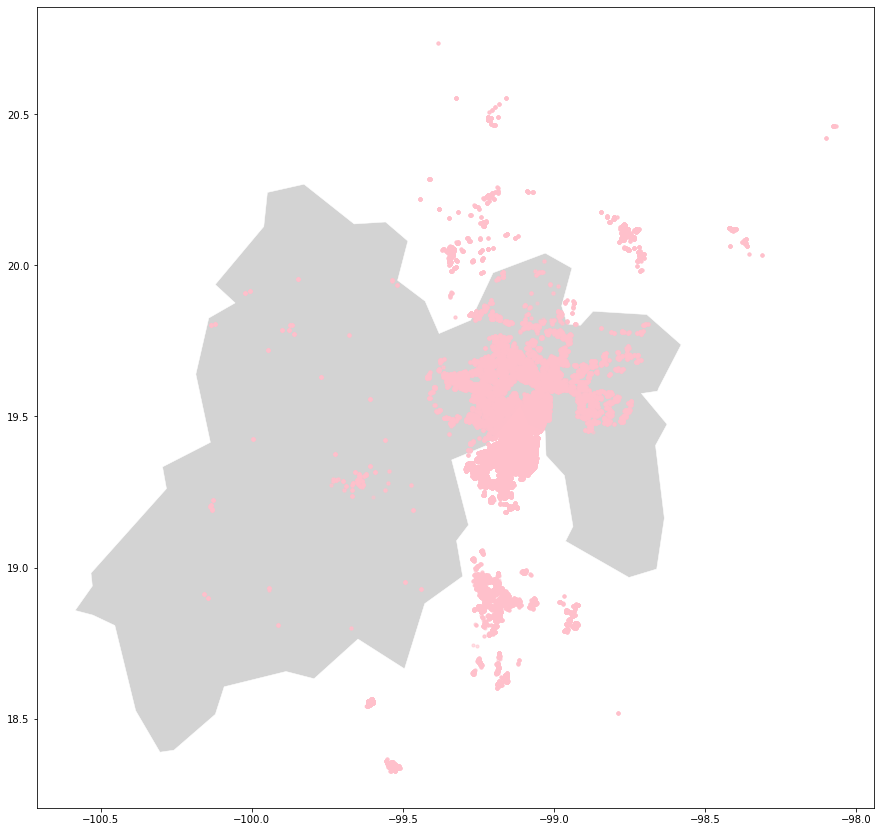

In [161]:
ax = EDOMEX.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,15))
# Pass ax=ax to the second layer
salesKellogs.plot(markersize=10, color='pink', alpha=0.5, ax=ax)

# EDO MEX plot sales Kellogs in ecatepec and neza con indices DENUE INEGI comercios al por menor

In [177]:
pointsDenue = denue.apply(lambda row: Point(row.Longitud, row.Latitud), axis=1)

In [178]:
comerciosOriente = gpd.GeoDataFrame(denue, geometry=pointsDenue)

In [179]:
comerciosOriente.crs = {'init': 'epsg:4326'}

In [180]:
comerciosOriente.head(2)

,id,nom_estab,nombre_act,per_ocu,tipo_asent,cod_postal,cve_mun,tipoUniEco,Latitud,Longitud,fecha_alta,geometry
0,9234749,241202 ECTP RECURSOS HUMANOS,Comercio al por menor en tiendas departamentales,101 a 250 personas,COLONIA,55500,33,Fijo,19.602150,-99.051596,2020-04,POINT (-99.05160 19.60215)
1,7022831,3 B,Comercio al por menor en minisupers,0 a 5 personas,COLONIA,55067,33,Fijo,19.648404,-98.993870,2019-11,POINT (-98.99387 19.64840)


<AxesSubplot:>

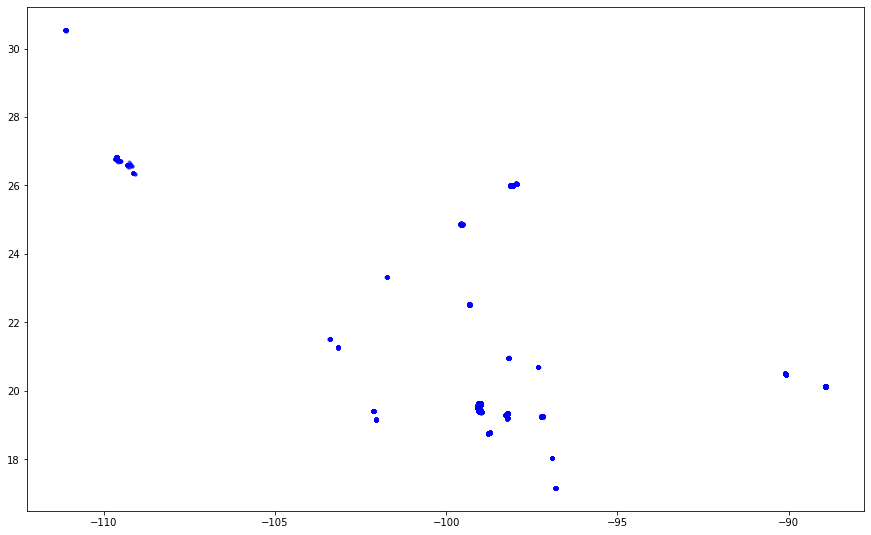

In [181]:
comerciosOriente.plot(figsize=(15,15), markersize=10, color='blue', alpha=0.5)

<AxesSubplot:>

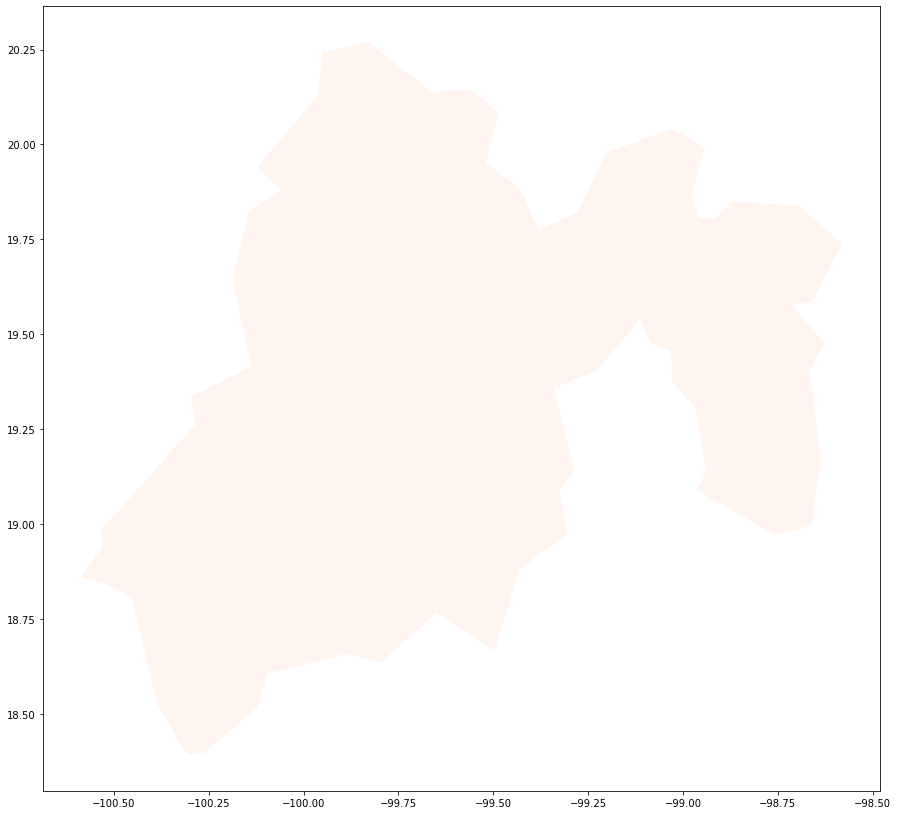

In [182]:
fig, ax = plt.subplots(1, figsize =(15, 15)) 
EDOMEX.plot(ax = ax, cmap ='Reds')

<AxesSubplot:>

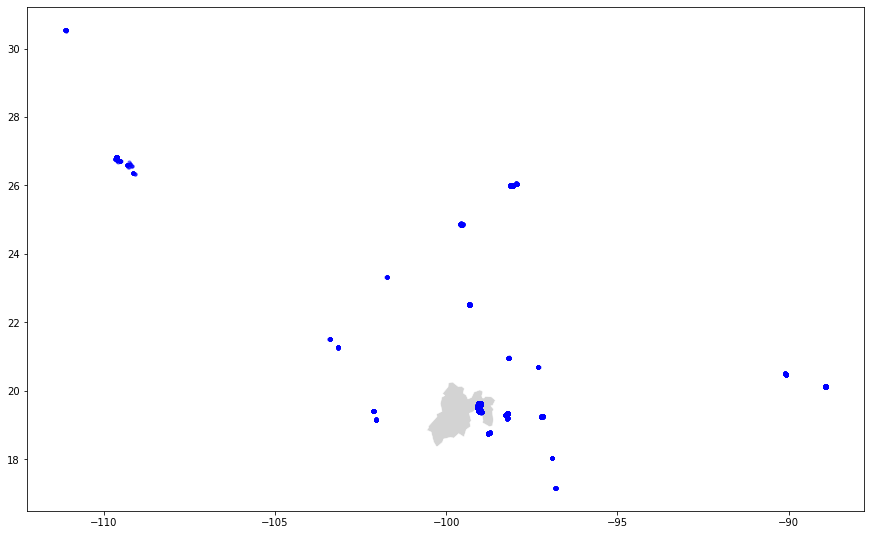

In [183]:
ax = EDOMEX.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,15))
# Pass ax=ax to the second layer
comerciosOriente.plot(markersize=10, color='blue', alpha=0.5, ax=ax)